#Ejercicio: Aproximación de la raíz cuadrada mediante Machine Learning

**Francisco Josse Rojas Rojas**

**Yeira Liseth Rodriguez Rodriguez**
##Objetivo del ejercicio

Este proyecto tiene como propósito demostrar cómo una técnica de *Machine Learning (ML)* puede aprender a predecir una función matemática —en este caso, la **raíz cuadrada (√x)**— a partir de datos generados desde otra función —la **raíz cúbica (∛x)**.

La idea parte del concepto introducido en la Figura 6.1 del documento guía, donde se contrasta la programación tradicional (que usa fórmulas explícitas) con el aprendizaje automático (que aprende desde ejemplos).


##¿Qué se hace en este notebook?

1. **Generación del dataset**:
   - Se generan 500 valores de `x` en el rango [0, 100].
   - Para cada `x`, se calcula su raíz cúbica `∛x`. Esta será la **entrada al modelo**.
   - Para cada `x`, se calcula su raíz cuadrada `√x`. Esta será la **salida esperada**.
   - Así, el modelo será entrenado para aprender a predecir `√x` *a partir* de `∛x`.

2. **Entrenamiento de modelos**:
   - Se dividen los datos en entrenamiento (80%) y prueba (20%).
   - Se entrenan dos modelos diferentes:
     - **Regresión lineal**: un modelo de tipo paramétrico, útil para establecer una línea base de rendimiento.
     - **Árbol de decisión**: un modelo no paramétrico, más flexible y adecuado para relaciones no lineales.

3. **Evaluación**:
   - Se usan 10 valores nuevos de `x` (entre 4 y 121).
   - Para estos valores:
     - Se calcula `∛x` para darlos como entrada al modelo.
     - Se predice `√x` con ambos modelos.
     - Se compara con el valor real de `√x` calculado con `np.sqrt`.

4. **Visualización**:
   - Se muestran las curvas de:
     - Valor real de `√x`.
     - Predicciones del modelo lineal.
     - Predicciones del árbol de decisión.
   - También se visualizan los datos usados para entrenamiento.

5. **Errores de predicción**:
   - Se calcula el **Error Cuadrático Medio (MSE)** para ambos modelos.
   - Esto permite cuantificar qué tan bien se aproxima cada modelo a la función real.


## Modelos utilizados

###Modelo 1: Regresión Lineal
- Tipo: Modelo supervisado paramétrico.
- Implementación: `LinearRegression()` de `scikit-learn`.
- Entrenamiento: basado en minimizar el error cuadrático medio entre las predicciones y los valores reales.
- Arquitectura: no usa capas ocultas, es una función lineal del tipo `y = wx + b`.
- Función de pérdida: error cuadrático medio (MSE).
- Tiempo de entrenamiento: prácticamente instantáneo por su bajo costo computacional.

###Modelo 2: Árbol de Decisión
- Tipo: Modelo supervisado no paramétrico.
- Implementación: `DecisionTreeRegressor()` de `scikit-learn`.
- Algoritmo: divide recursivamente el espacio de entrada (∛x) en particiones que minimizan la impureza (varianza).
- Hiperparámetros usados: por defecto (`max_depth=None`, es decir, el árbol se expande hasta que los nodos son puros).
- Entrenamiento: el árbol se construye top-down con estrategia “greedy” (divide y vencerás).
- Función de pérdida: reducción de varianza (para regresión).

### Nota importante sobre los resultados

**IMPORTANTE**

Aunque el árbol de decisión es más flexible y capaz de aprender relaciones no lineales, en este caso el modelo de regresión lineal se comportó de manera sorprendentemente eficaz. Esto se debe a que:

- La transformación de entrada (`∛x`) ya suaviza la relación original `x → √x`, haciendo que una función lineal se aproxime bastante bien a la curva.
- El árbol de decisión tiende a producir predicciones constantes por tramos, lo que puede resultar en errores discretos cuando se necesita una transición suave.

Este comportamiento muestra que **no siempre el modelo más complejo es el mejor**. Es crucial probar distintos enfoques, visualizar sus resultados y comparar su error para elegir la mejor solución.

##Conclusión

Este ejercicio demuestra que **Machine Learning puede aprender transformaciones matemáticas complejas** sin necesidad de conocer la fórmula explícita. A través de suficientes ejemplos (`∛x` → `√x`), los modelos logran aprender la relación subyacente entre las variables y generalizarla a nuevos valores.

Además, se evidencia cómo distintos algoritmos tienen rendimientos diferentes dependiendo del tipo de función que se quiere aproximar.

Este enfoque es especialmente útil cuando la función real es desconocida, muy costosa de calcular, o proviene de datos experimentales, y necesitamos un modelo que la aproxime con precisión.

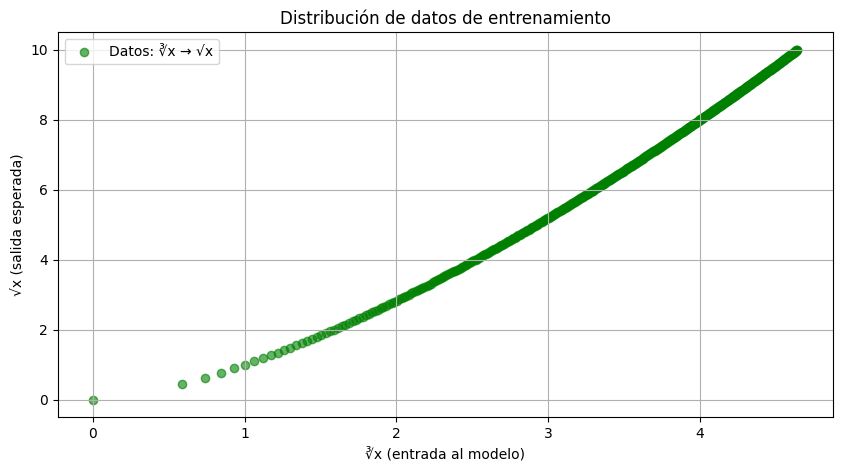

📊 Comparación de resultados:
     x  ∛x (entrada)  √x real  Modelo Lineal  Modelo Árbol
0    4      1.587401      2.0       1.702404      2.002003
1    9      2.080084      3.0       2.991475      3.003005
2   16      2.519842      4.0       4.142073      4.004006
3   25      2.924018      5.0       5.199571      5.005008
4   36      3.301927      6.0       6.188346      5.989302
5   49      3.659306      7.0       7.123402      7.007011
6   64      4.000000      8.0       8.014806      7.995490
7   81      4.326749      9.0       8.869722      8.997884
8  100      4.641589     10.0       9.693480     10.000000
9  121      4.946087     11.0      10.490180     10.000000

📉 Error cuadrático medio:
Lineal: 0.0570
Árbol: 0.1000


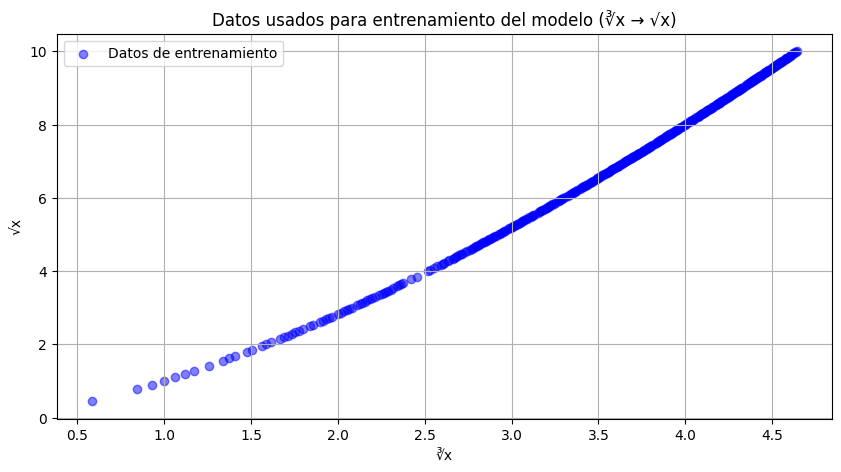

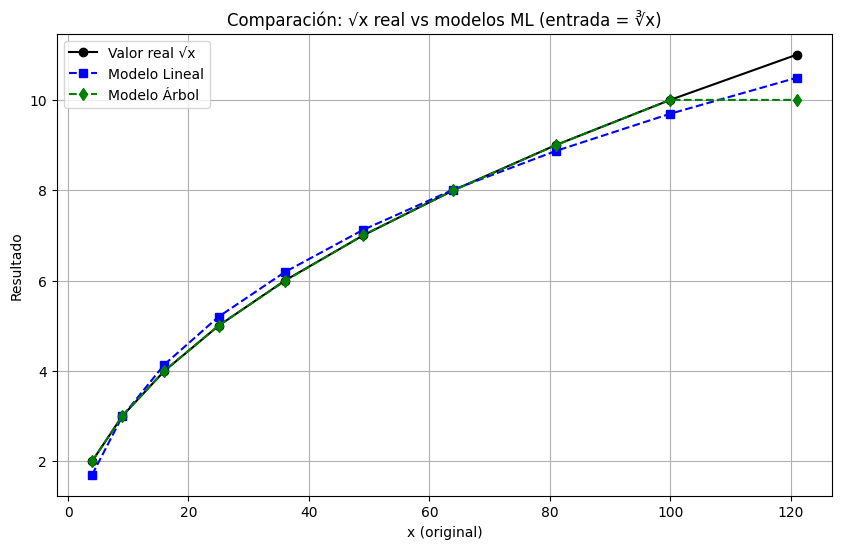

In [3]:
# -----------------------------
#FRANCISCO JOSE ROJAS ROJAS
#YEIRA LISETH RODRIGUEZ RODRIGUEZ
# ML: Aproximación de √x usando ∛x como entrada
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Generar dataset: entrada = raíz cúbica, salida = raíz cuadrada
x = np.linspace(0, 100, 500).reshape(-1, 1)         # Valores reales
x_input = np.cbrt(x)                                # Entrada al modelo: raíz cúbica
y_target = np.sqrt(x)                               # Etiqueta real: raíz cuadrada

# 2. Visualizar datos de entrada vs salida esperada
plt.figure(figsize=(10, 5))
plt.scatter(x_input, y_target, c='green', alpha=0.6, label='Datos: ∛x → √x')
plt.title("Distribución de datos de entrenamiento")
plt.xlabel("∛x (entrada al modelo)")
plt.ylabel("√x (salida esperada)")
plt.legend()
plt.grid(True)
plt.show()

# 3. Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.2, random_state=42)

# 4. Entrenar modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# 5. Entrenar modelo de árbol de decisión
modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X_train, y_train)

# 6. Probar con nuevos ejemplos
x_nuevo = np.array([4, 9, 16, 25, 36, 49, 64, 81, 100, 121]).reshape(-1, 1)
x_nuevo_input = np.cbrt(x_nuevo)           # Entrada: raíz cúbica
y_real = np.sqrt(x_nuevo)                  # Valor real a predecir: raíz cuadrada

# Predicciones
y_pred_lineal = modelo_lineal.predict(x_nuevo_input)
y_pred_arbol = modelo_arbol.predict(x_nuevo_input)

# 7. Mostrar resultados en tabla
df_resultados = pd.DataFrame({
    "x": x_nuevo.flatten(),
    "∛x (entrada)": x_nuevo_input.flatten(),
    "√x real": y_real.flatten(),
    "Modelo Lineal": y_pred_lineal.flatten(),
    "Modelo Árbol": y_pred_arbol.flatten()
})
print("📊 Comparación de resultados:")
print(df_resultados)

# 8. Error cuadrático medio
print("\n📉 Error cuadrático medio:")
print(f"Lineal: {mean_squared_error(y_real, y_pred_lineal):.4f}")
print(f"Árbol: {mean_squared_error(y_real, y_pred_arbol):.4f}")

# 9. Visualización de entrenamiento
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Datos de entrenamiento')
plt.title('Datos usados para entrenamiento del modelo (∛x → √x)')
plt.xlabel('∛x')
plt.ylabel('√x')
plt.legend()
plt.grid(True)
plt.show()

# 10. Visualización comparativa
plt.figure(figsize=(10, 6))

plt.plot(x_nuevo, y_real, 'o-', label='Valor real √x', color='black')
plt.plot(x_nuevo, y_pred_lineal, 's--', label='Modelo Lineal', color='blue')
plt.plot(x_nuevo, y_pred_arbol, 'd--', label='Modelo Árbol', color='green')

plt.title('Comparación: √x real vs modelos ML (entrada = ∛x)')
plt.xlabel('x (original)')
plt.ylabel('Resultado')
plt.legend()
plt.grid(True)
plt.show()